In [21]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Syneromics plots

In [22]:
synergies = pd.read_csv("syn_results/final_results.tsv", sep='\t')

In [23]:
synergies.snps.drop_duplicates()

0                       P30050.RL12_HUMAN*Q01650.LAT1_HUMAN
1                       P08183.MDR1_HUMAN*Q9BTC8.MTA3_HUMAN
2                      Q14137.BOP1_HUMAN*Q96SB4.SRPK1_HUMAN
3                      P30050.RL12_HUMAN*Q92520.FAM3C_HUMAN
4                      Q14C86.GAPD1_HUMAN*Q9NQH7.XPP3_HUMAN
                                ...                        
690536    P60174.TPIS_HUMAN*Q15554.TERF2_HUMAN*Q7L1Q6.B-...
690537    O15427.MOT4_HUMAN*O75396.SC22B_HUMAN*P35908.K2...
690538    O43760.SNG2_HUMAN*Q02127.PYRD_HUMAN*Q8NFJ5.RAI...
690539    A0A0U1.RRL7MMPOS_HUMAN*A2RRP1.NBAS_HUMAN*O4349...
690540    O95104.SCAF4_HUMAN*Q13586.STIM1_HUMAN*Q13867.B...
Name: snps, Length: 654036, dtype: object

In [24]:
synergies

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug
0,PdaafaRLbcHUMAN:QabgfaLATbHUMAN,0.262239,0.055,4.785774,0.000002,0.154754,0.369725,1479,0.091693,True,P30050.RL12_HUMAN*Q01650.LAT1_HUMAN,2,1007
1,PaibidMDRbHUMAN:QjBTCiMTAdHUMAN,-0.073945,0.032,-2.318836,0.020540,-0.136498,-0.011393,1479,0.068916,True,P08183.MDR1_HUMAN*Q9BTC8.MTA3_HUMAN,2,1007
2,QbebdhBOPbHUMAN:QjgSBeSRPKbHUMAN,0.135497,0.066,2.050156,0.040526,0.005855,0.265140,1479,0.036043,True,Q14137.BOP1_HUMAN*Q96SB4.SRPK1_HUMAN,2,1007
3,PdaafaRLbcHUMAN:QjcfcaFAMdCHUMAN,-0.128539,0.087,-1.475486,0.140295,-0.299423,0.042346,1479,0.051811,True,P30050.RL12_HUMAN*Q92520.FAM3C_HUMAN,2,1007
4,QbeCigGAPDbHUMAN:QjNQHhXPPdHUMAN,-0.013414,0.014,-0.956738,0.338856,-0.040915,0.014088,1479,0.020764,True,Q14C86.GAPD1_HUMAN*Q9NQH7.XPP3_HUMAN,2,1007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
690536,PgabheTPISHUMAN:QbfffeTERFcHUMAN:QhLbQgBZWbHUM...,-0.000389,0.000,-1.656201,0.097895,-0.000849,0.000072,1473,0.320666,True,P60174.TPIS_HUMAN*Q15554.TERF2_HUMAN*Q7L1Q6.B-...,4,1072
690537,ObfechMOTeHUMAN:OhfdjgSCccBHUMAN:PdfjaiKccEHUM...,-0.000728,0.000,-1.675555,0.094039,-0.001580,0.000124,1473,0.339293,True,O15427.MOT4_HUMAN*O75396.SC22B_HUMAN*P35908.K2...,4,1072
690538,OedhgaSNGcHUMAN:QacbchPYRDHUMAN:QiNFJfRAIdHUMA...,-0.001180,0.001,-1.374116,0.169616,-0.002865,0.000505,1473,0.326192,True,O43760.SNG2_HUMAN*Q02127.PYRD_HUMAN*Q8NFJ5.RAI...,4,1072
690539,AaAaUbRRLhMMPOSHUMAN:AcRRPbNBASHUMAN:OedejdTGO...,-0.000686,0.001,-1.259655,0.207994,-0.001755,0.000382,1473,0.336131,True,A0A0U1.RRL7MMPOS_HUMAN*A2RRP1.NBAS_HUMAN*O4349...,4,1072


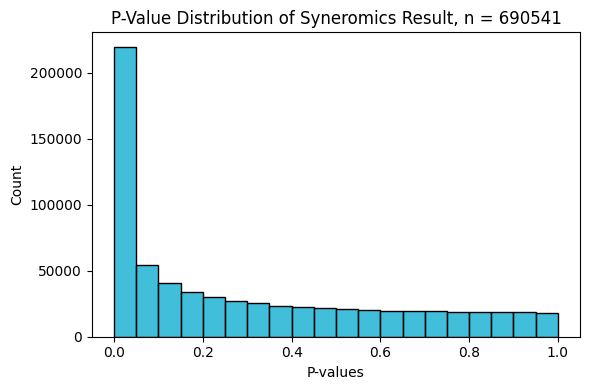

In [25]:
plt.rcParams['figure.figsize']=(6,4)
hist = sns.histplot(synergies, x='P>|z|', bins=20, color='#00A9CE')
hist.set(xlabel="P-values", title=f"P-Value Distribution of Syneromics Result, n = {len(synergies.coef_id)}")
# plt.savefig('img/p-value.png')
plt.show()

In [26]:
sum(synergies['P>|z|'] == 0.0)

0

In [27]:
del synergies

### Explainability plots

In [28]:
models = pd.read_csv("exp_results/combined_models.tsv", sep='\t')

In [29]:
syn_mask = models.coef_id.str.contains(':')

In [30]:
synergies = models[syn_mask]
synergies = synergies[synergies.order == 4]
synergies.config.value_counts()

config
a: 0.05 f: 0       20413
a: 0.01 f: 0       15926
a: 0.001 f: 0      11390
a: 0.05 f: 0.5      1328
a: 0.01 f: 0.5      1151
a: 0.001 f: 0.5      935
Name: count, dtype: int64

In [31]:
n = synergies.config.value_counts()

In [32]:
csiro_palette = ['#00B0F0', '#00A9CE', '#007377', '#1E22AA', '#6D2077']

sns.set_palette(palette=csiro_palette)

In [33]:
model_4 = models[models.order ==4]

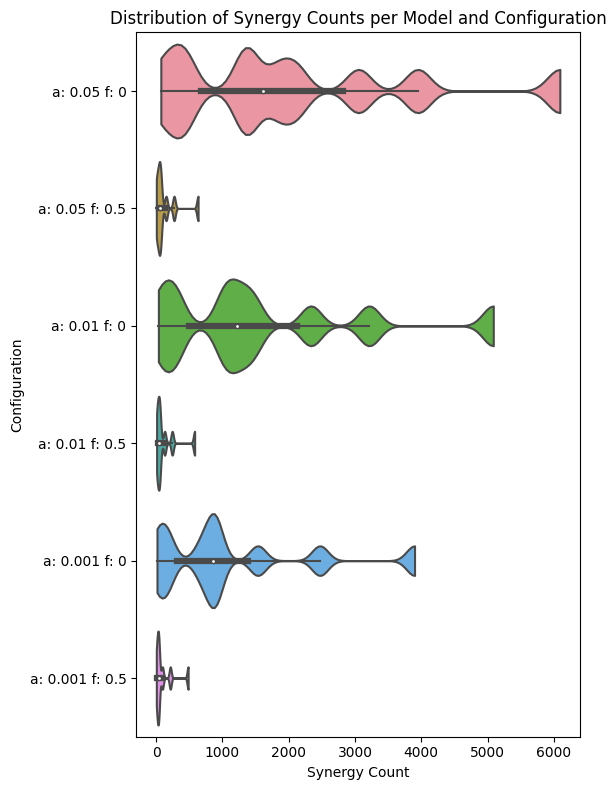

In [34]:
plt.rcParams['figure.figsize']=(6,8)
plt.rcParams['figure.autolayout'] = True

plot = sns.violinplot(model_4[["drug","n_syn","config"]].drop_duplicates(), x="n_syn", y="config",orient="h", cut=0, scale="width", bw=0.1)
plot.set_title("Distribution of Synergy Counts per Model and Configuration")
plot.set(xlabel="Synergy Count", ylabel="Configuration")
plot.set_yticks(range(len(n)))
# plot.set_yticklabels([f'alpha: 0.05 \n filter: 0 \n n = {n[0]}', f'alpha: 0.05 \n filter: 0.5 \n n = {n[2]}', f'alpha: 0.01 \n filter: 0 \n n = {n[1]}', f'alpha: 0.01 \n filter: 0.5 \n n = {n[3]}'])
# plt.savefig('img/synergy_count.png')
plt.show()

In [35]:
len(set(models.drug))

10

In [36]:
models.drug.value_counts()

drug
1011    43967
1013    21901
1022    16793
1050     9464
1021     9426
1010     8175
1047     7400
1049     3643
1007     1421
1072      264
Name: count, dtype: int64

In [53]:
models[models.drug==1072]

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,train_pseudo_r2,train_adj_r2,...,pearsonR,order,drug,n_prot,n_obs,n_feat,n_syn,fit,config,Proteins
122190,Intercept,2.221306,0.082,27.077719,2.453137e-131,2.060389,2.382223,1473,0.319214,0.318287,...,0.545293,1,1072,2,1473,2,0,normal,a: 0.05 f: 0,Intercept
122191,maxscreeningconc,0.267580,0.010,25.974252,9.959016e-123,0.247372,0.287787,1473,0.319214,0.318287,...,0.545293,1,1072,2,1473,2,0,normal,a: 0.05 f: 0,maxscreeningconc
122192,QigYbdDZIPdHUMAN,-0.373848,0.092,-4.070734,4.935898e-05,-0.553996,-0.193701,1473,0.319214,0.318287,...,0.545293,1,1072,2,1473,2,0,normal,a: 0.05 f: 0,Q86Y13.D-7IP3_HUMAN
122193,Intercept,2.330475,0.599,3.889296,1.052497e-04,1.155044,3.505907,1473,0.421030,0.391255,...,0.545177,2,1072,2,1473,72,70,normal,a: 0.05 f: 0,Intercept
122194,maxscreeningconc,0.267488,0.010,27.444109,4.895865e-133,0.248368,0.286607,1473,0.421030,0.391255,...,0.545177,2,1072,2,1473,72,70,normal,a: 0.05 f: 0,maxscreeningconc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122449,PdbbfdMETKcHUMAN:QbfafaRRSbHUMAN,-0.023589,0.005,-5.035664,5.355194e-07,-0.032778,-0.014400,1473,0.350780,0.344996,...,0.549533,4,1072,1,1473,13,12,normal,a: 0.001 f: 0,P31153.METK2_HUMAN:Q15050RRS1_HUMAN+P31153.MET...
122450,OhfafeIGSFdHUMAN:QjNZJhMTCHbHUMAN,-0.012823,0.007,-1.932951,5.343552e-02,-0.025835,0.000190,1473,0.350780,0.344996,...,0.549533,4,1072,1,1473,13,12,normal,a: 0.001 f: 0,O75054.IGSF3_HUMAN:Q9N-7J7MTCH1_HUMAN+O75054.I...
122451,PdafggPURiHUMAN:QbdiihKLFfHUMAN,0.017969,0.008,2.231816,2.577850e-02,0.002176,0.033762,1473,0.350780,0.344996,...,0.549533,4,1072,1,1473,13,12,normal,a: 0.001 f: 0,P30566.PUR8_HUMAN:Q13887KLF5_HUMAN+P30566.PUR8...
122452,OhfediNDUBbHUMAN:QjNRbcPDLIhHUMAN,0.007924,0.003,2.528991,1.154373e-02,0.001778,0.014071,1473,0.350780,0.344996,...,0.549533,4,1072,1,1473,13,12,normal,a: 0.001 f: 0,O75438.NDUB1_HUMAN:Q9NR12PDLI7_HUMAN+O75438.ND...


In [32]:
del models

In [37]:
performance = pd.read_csv("exp_results/combined_performances.tsv", sep='\t')

In [38]:
performance

,train_pseudo_r2,train_adj_r2,train_MSE,MSE,train_pearsonR,pearsonR,drug,order,config
0,0.139409,0.134726,2.246743,1.977754,0.373375,0.362788,1007,1,a: 0.05 f: 0
1,0.480568,0.333576,1.356080,2.210841,0.693230,0.447646,1007,2,a: 0.05 f: 0
2,0.480877,0.332814,1.355275,2.208102,0.693453,0.448250,1007,4,a: 0.05 f: 0
3,0.139409,0.134726,2.246743,1.977754,0.373375,0.362788,1007,1,a: 0.05 f: 0.5
4,0.233994,0.210491,1.999810,1.828916,0.483730,0.457300,1007,2,a: 0.05 f: 0.5
...,...,...,...,...,...,...,...,...,...
169,0.374393,0.359602,0.895412,0.834989,0.611877,0.574591,1072,2,a: 0.01 f: 0
170,0.374393,0.359602,0.895412,0.834989,0.611877,0.574591,1072,4,a: 0.01 f: 0
171,0.311539,0.311071,0.985373,0.878606,0.558157,0.539593,1072,1,a: 0.001 f: 0
172,0.350780,0.344996,0.929208,0.872522,0.592267,0.549533,1072,2,a: 0.001 f: 0


In [39]:
performance[["config", "order"]].value_counts()

config           order
a: 0.001 f: 0    1        10
a: 0.01 f: 0     4        10
a: 0.05 f: 0.5   2        10
                 1        10
a: 0.05 f: 0     4        10
                 2        10
                 1        10
a: 0.001 f: 0    2        10
a: 0.05 f: 0.5   4        10
a: 0.01 f: 0     2        10
                 1        10
a: 0.001 f: 0    4        10
a: 0.01 f: 0.5   2         9
                 4         9
a: 0.001 f: 0.5  4         9
                 2         9
                 1         9
a: 0.01 f: 0.5   1         9
Name: count, dtype: int64

In [40]:
n = performance.config.value_counts()

In [41]:
no_nan = performance.dropna()
no_nan

,train_pseudo_r2,train_adj_r2,train_MSE,MSE,train_pearsonR,pearsonR,drug,order,config
0,0.139409,0.134726,2.246743,1.977754,0.373375,0.362788,1007,1,a: 0.05 f: 0
1,0.480568,0.333576,1.356080,2.210841,0.693230,0.447646,1007,2,a: 0.05 f: 0
2,0.480877,0.332814,1.355275,2.208102,0.693453,0.448250,1007,4,a: 0.05 f: 0
3,0.139409,0.134726,2.246743,1.977754,0.373375,0.362788,1007,1,a: 0.05 f: 0.5
4,0.233994,0.210491,1.999810,1.828916,0.483730,0.457300,1007,2,a: 0.05 f: 0.5
...,...,...,...,...,...,...,...,...,...
169,0.374393,0.359602,0.895412,0.834989,0.611877,0.574591,1072,2,a: 0.01 f: 0
170,0.374393,0.359602,0.895412,0.834989,0.611877,0.574591,1072,4,a: 0.01 f: 0
171,0.311539,0.311071,0.985373,0.878606,0.558157,0.539593,1072,1,a: 0.001 f: 0
172,0.350780,0.344996,0.929208,0.872522,0.592267,0.549533,1072,2,a: 0.001 f: 0


In [42]:
rf = pd.read_csv("syn_results/tree_performances.tsv", sep='\t')

In [43]:
rf["config"] = "rf"
rf["order"] = 1

In [44]:
combine = pd.concat([performance, rf], ignore_index=True)

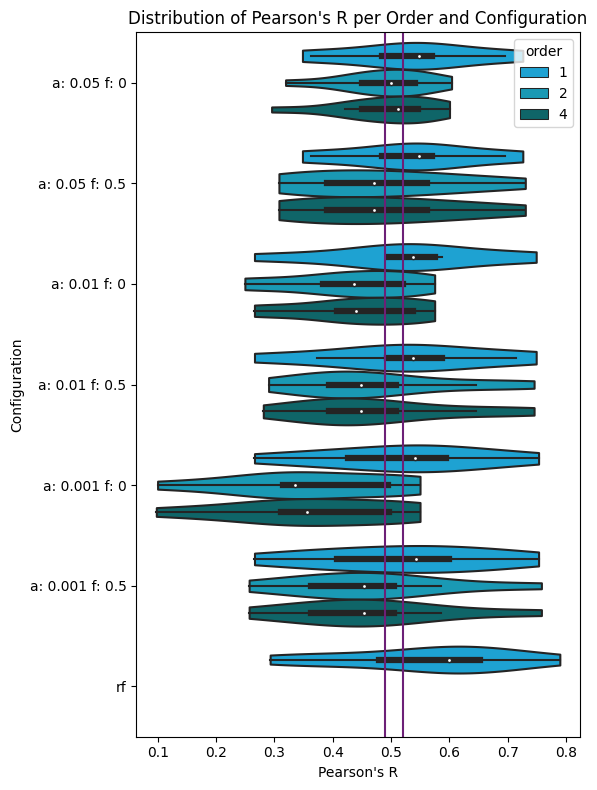

In [45]:
plt.rcParams['figure.figsize']=(6,8)
plt.rcParams['figure.autolayout'] = True
violin = sns.violinplot(combine, x="pearsonR", y="config", hue="order", orient="h", cut=0, scale="count")
plt.axvline(0.49, 0, c="#6D2077")
plt.axvline(0.52, 0, c="#6D2077")
# plt.axvline(combine.pearsonR.mean(), 0, c="#6D2077")
violin.set_title("Distribution of Pearson's R per Order and Configuration")
violin.set(xlabel="Pearson's R", ylabel="Configuration")
# violin.set_yticks(range(5))
# violin.set_yticklabels([f'Alpha: 0.05 \nFilter: 0 \nn = {n[3*2]}', f'Alpha: 0.05 \nFilter: 0.5 \nn = {n[3*3]}', f'Alpha: 0.01 \nFilter: 0 \nn = {n[3*0]}', f'Alpha: 0.01 \nFilter: 0.5 \nn = {n[3*1]}', f'Random Forest \nn = {len(rf.order)}'])

# y_pos = [2,3,0,1]
# for i in range(4):
#     violin.text(0.75, y_pos[i]+0.2, f'n = {n[3*i]} \n \nn = {n[3*i+1]} \n \nn = {n[3*i+2]}')
# violin.text(0.75, 4-0.4, f'n = {len(rf.order)}')
# violin.text(-0.025, 4+0.4, f'ProCan mean values')
# plt.savefig('img/personR.png') #
plt.show()

In [47]:
pearsonR = pd.pivot_table(performance, values = 'pearsonR', index=['drug','config'], columns=["order"])

In [54]:
n = pearsonR.count()
n

order
1    58
2    58
4    58
dtype: int64

In [48]:
pearsonR

order                        1         2         4
drug config                                       
1007 a: 0.001 f: 0    0.265922  0.435012  0.435012
     a: 0.001 f: 0.5  0.265922  0.362789  0.362789
     a: 0.01 f: 0     0.265922  0.430420  0.427922
     a: 0.01 f: 0.5   0.265922  0.379143  0.379143
     a: 0.05 f: 0     0.362788  0.447646  0.448250
     a: 0.05 f: 0.5   0.362788  0.457300  0.457300
1010 a: 0.001 f: 0    0.752644  0.351439  0.379315
     a: 0.001 f: 0.5  0.752644  0.757484  0.757484
     a: 0.01 f: 0     0.748560  0.521471  0.524266
     a: 0.01 f: 0.5   0.748560  0.744945  0.744945
     a: 0.05 f: 0     0.725616  0.603564  0.600064
     a: 0.05 f: 0.5   0.725616  0.729898  0.729898
1011 a: 0.001 f: 0    0.542975  0.513531  0.525769
     a: 0.001 f: 0.5  0.542975  0.256753  0.256753
     a: 0.01 f: 0     0.498417  0.520245  0.545869
     a: 0.01 f: 0.5   0.498417  0.412861  0.412861
     a: 0.05 f: 0     0.569577  0.504813  0.531660
     a: 0.05 f: 0.5   0.569577  0.546887  0.546887
1013 a: 0.001 f: 0    0.578586  0.516341  0.516617
     a: 0.001 f: 0.5  0.578586  0.481045  0.470217
     a: 0.01 f: 0     0.537099  0.527640  0.541966
     a: 0.01 f: 0.5   0.537099  0.290092  0.281037
     a: 0.05 f: 0     0.509270  0.529737  0.546668
     a: 0.05 f: 0.5   0.509270  0.307950  0.308006
1021 a: 0.001 f: 0    0.407835  0.222840  0.204472
     a: 0.001 f: 0.5  0.407835  0.362775  0.362775
     a: 0.01 f: 0     0.538616  0.401537  0.401415
     a: 0.01 f: 0.5   0.538616  0.393910  0.393910
     a: 0.05 f: 0     0.551475  0.457589  0.453936
     a: 0.05 f: 0.5   0.551475  0.484981  0.484981
1022 a: 0.001 f: 0    0.483209  0.318666  0.313330
     a: 0.001 f: 0.5  0.483209  0.505140  0.505140
     a: 0.01 f: 0     0.493618  0.443515  0.451572
     a: 0.01 f: 0.5   0.493618  0.460310  0.460310
     a: 0.05 f: 0     0.476778  0.496496  0.492321
     a: 0.05 f: 0.5   0.476778  0.307814  0.307814
1047 a: 0.001 f: 0    0.686773  0.317281  0.330906
     a: 0.001 f: 0.5  0.686773  0.585736  0.585736
     a: 0.01 f: 0     0.713553  0.377818  0.425645
     a: 0.01 f: 0.5   0.713553  0.644913  0.644913
     a: 0.05 f: 0     0.694728  0.550598  0.554479
     a: 0.05 f: 0.5   0.694728  0.650897  0.650897
1049 a: 0.001 f: 0    0.599155  0.314866  0.310537
     a: 0.001 f: 0.5  0.599155  0.453924  0.453924
     a: 0.01 f: 0     0.587793  0.249476  0.275671
     a: 0.01 f: 0.5   0.587793  0.509182  0.509182
     a: 0.05 f: 0     0.571305  0.319171  0.295241
     a: 0.05 f: 0.5   0.571305  0.398241  0.398241
1050 a: 0.001 f: 0    0.373136  0.099909  0.097762
     a: 0.001 f: 0.5  0.373136  0.449560  0.449560
     a: 0.01 f: 0     0.373136  0.249564  0.265860
     a: 0.01 f: 0.5   0.373136  0.448170  0.448170
     a: 0.05 f: 0     0.348101  0.419606  0.420655
     a: 0.05 f: 0.5   0.348101  0.387737  0.387737
1072 a: 0.001 f: 0    0.539593  0.549533  0.549533
     a: 0.01 f: 0     0.539593  0.574591  0.574591
     a: 0.05 f: 0     0.545293  0.545177  0.545177
     a: 0.05 f: 0.5   0.545293  0.565908  0.565908

In [49]:
improve = pearsonR[pearsonR.iloc[:,0] < pearsonR.iloc[:,1]]
improve

order                        1         2         4
drug config                                       
1007 a: 0.001 f: 0    0.265922  0.435012  0.435012
     a: 0.001 f: 0.5  0.265922  0.362789  0.362789
     a: 0.01 f: 0     0.265922  0.430420  0.427922
     a: 0.01 f: 0.5   0.265922  0.379143  0.379143
     a: 0.05 f: 0     0.362788  0.447646  0.448250
     a: 0.05 f: 0.5   0.362788  0.457300  0.457300
1010 a: 0.001 f: 0.5  0.752644  0.757484  0.757484
     a: 0.05 f: 0.5   0.725616  0.729898  0.729898
1011 a: 0.01 f: 0     0.498417  0.520245  0.545869
1013 a: 0.05 f: 0     0.509270  0.529737  0.546668
1022 a: 0.001 f: 0.5  0.483209  0.505140  0.505140
     a: 0.05 f: 0     0.476778  0.496496  0.492321
1050 a: 0.001 f: 0.5  0.373136  0.449560  0.449560
     a: 0.01 f: 0.5   0.373136  0.448170  0.448170
     a: 0.05 f: 0     0.348101  0.419606  0.420655
     a: 0.05 f: 0.5   0.348101  0.387737  0.387737
1072 a: 0.001 f: 0    0.539593  0.549533  0.549533
     a: 0.01 f: 0     0.539593  0.574591  0.574591
     a: 0.05 f: 0.5   0.545293  0.565908  0.565908

In [50]:
drugs = [x[0] for x in improve.index.to_flat_index()]

In [51]:
len(set(drugs))

7